In [3]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_excel('V02Max_Combined.xlsx')
data_Merged = pd.read_excel("merged_athletes_data.xlsx")
data_Kayaking = pd.read_excel("V02Max_Combined.xlsx", "Kayaking")
data_Athletes = pd.read_excel("V02Max_Combined.xlsx", "Athletes")
data_Triathlon = pd.read_excel("V02Max_Combined.xlsx", "Triathlon")
data_Fencing = pd.read_excel("V02Max_Combined.xlsx", "Fencing")

/Users/sravanthithiruveedi/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/Users/sravanthithiruveedi/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/Users/sravanthithiruveedi/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


**61. Reverse an arrays order in Python. You can use any array with any values you like.**

In [5]:
#define an array
arr = ['2024','Aug','Hackathon','Python']
#reverse an array
arr.reverse()
#print the array
print(arr)

['Python', 'Hackathon', 'Aug', '2024']


**62. What is the root mean of successive differences for 30 consecutive minutes for each athlete.**

In [6]:
#reading the data
successive_differences = np.diff(data)
successive_differences


grouped = df.groupby(['Category', 'Subcategory']).mean().reset_index()

NameError: name 'df' is not defined

**63. On average how many minutes did each athlete in the sport of fencing spend in Zone 5?**

In [172]:

df = data_Fencing.assign(HR = 60/(data_Fencing['RR']/1000))
df['Max HR'] = df = 220 - data_Athletes['age']
dfnew['LB_Zone5'] = 0.90 * dfnew['Max HR']
dfnew['UB_Zone5'] = 1 * dfnew['Max HR']
#dfnew
#df1 = df[(df['HR']>dfnew['LB_Zone5']) & (df['HR']<dfnew['UB_Zone5'])]
#df['HR']>dfnew['LB_Zone5']
df
#use a column to label zones

,ID,time,RR,VO2,power,HR
0,1,-130.840,672,0.302008,0,89.285714
1,1,-130.168,672,0.302008,0,89.285714
2,1,-129.536,632,0.301336,0,94.936709
3,1,-128.824,712,0.301336,0,84.269663
4,1,-127.948,876,0.301336,0,68.493151
...,...,...,...,...,...,...
27598,10,942.700,428,0.786363,0,140.186916
27599,10,943.124,424,0.786363,0,141.509434
27600,10,943.552,428,0.786363,0,140.186916
27601,10,943.976,424,0.786363,0,141.509434


**64. Count athletes based on Gender using count plot**

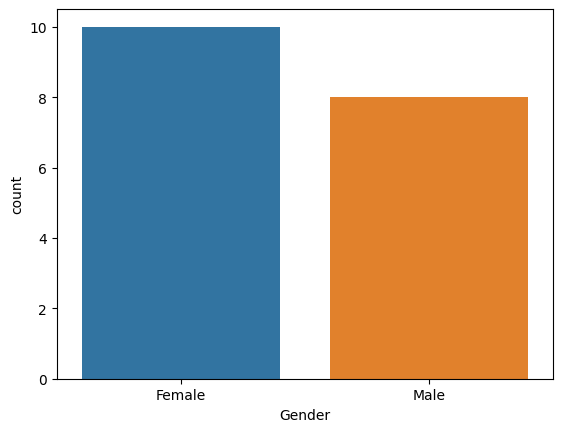

In [10]:
#count plot
sns.countplot(x ='Gender',data = data_Athletes, hue = 'Gender')
#show the plot
plt.show()

**65.    [ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
      [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20],
      [21, 22, 23, 24, 25],
      [26, 27, 28, 29, 30]  Use array slicing to display elements 4,7,10,17.**

In [9]:
#given array
arr = np.array([
      [ 1,  2,  3,  4,  5],
      [ 6,  7,  8,  9, 10],
      [11, 12, 13, 14, 15],
      [16, 17, 18, 19, 20],
      [21, 22, 23, 24, 25],
      [26, 27, 28, 29, 30]
      ])
#print the elements 4,7,10,17
print('Sliced elements: \n',arr[0:1, 3:4],arr[1:2, 1:2],arr[1:2, 4:],arr[3:4, 1:2] )

Sliced elements: 
 [[4]] [[7]] [[10]] [[17]]


**66. On average, how long did each participant spend at 200 watts?**

In [8]:
#grouping the data based on ID and power and finding the sum of time spent
df = data_Merged.groupby(['ID', 'power'])['time'].sum().reset_index()
#applying the given condition
df1 = df[df['power']== 200]
#printing the resultant data
df1

,ID,power,time
29,3,200,111063.168
48,4,200,106129.452
67,5,200,123354.488
84,6,200,124098.652
119,9,200,12405.704
131,10,200,74352.920
143,11,200,114078.616
164,12,200,113048.112
183,13,200,117426.128
203,14,200,136842.528


**67. Athletes from which sport had the highest average cardiorespiratory fitness in terms of v02 max?**

In [148]:
#grouping the data and calculating VO2Sum for each athlete
df = data_Merged.groupby(['ID'])['VO2'].sum().reset_index(name = 'VO2Sum')
#merging the data to fetch the weight of each athlete
df1 = pd.merge(df, data_Athletes[['ID','Weight']], on='ID', how='inner')
#calculating VO2Max
df1['VO2Max'] = df1['VO2Sum']/df1['Weight']
#fetching the athlete data with max VO2
df2 = df1[df1['VO2Max'] == max(df1['VO2Max'])]
df3 = pd.merge(df2, data_Athletes[['ID','First Name','Last Name','sport']], on='ID', how='left')
sprt = df3['sport'].values[0]
#printing the sport
print(f"Athlete from {val} had the highest average")

Athlete from kayak had the highest average


**pending68. What % of athletes exceeded 90% of max HR? (Max HR is calculated as 220-Age)**

In [10]:
#first find hr, then max hr and then 90% of max hr and then % of athelets
#data_Merged.head()
df1 = data_Merged.assign(HR = 60/(data_Merged['RR']/1000))
df2 = .head()

SyntaxError: invalid syntax (3246078284.py, line 4)

**69. What was the lowest heart rate recorded at a power wattage of 200**

In [11]:
#calculating heart rate and creating a new dataframe
df1 = data_Merged.assign(HR = 60/(data_Merged['RR']/1000))
#applying the condition on the dataframe
df2 = df1[df1['power']==200]
#printing the lowest heart rate 
print('Lowest heart rate recorded at a power wattage of 200 is \n',df2['HR'].min())

Lowest heart rate recorded at a power wattage of 200 is 
 71.77033492822967


**71. Create a crosstab to show each sport as a column and each heart rate zone as rows with counts of rows that satisfy each condition as values**

**72. Provide an example of a lambda function that multiplies any 2 input values.**

In [1]:
#lambda function
multiply = lambda x, y: x * y
#getting input from the user
x = float(input("Enter the first number: "))
y = float(input("Enter the second number: "))
#calling the lambda function with user inputs and printing the result
result = multiply(x, y)
print(f"The result of multiplying {x} and {y} is: {result}")

Enter the first number: 6
Enter the second number: 8
The result of multiplying 6.0 and 8.0 is: 48.0


**74. Take a students full name and reverse it using a for loop**

In [114]:
#taking an athlete name
df = data_Athletes.iloc[[9]]
#concatenating first name and last name to get the full name
name = df['First Name'] + ' ' + df['Last Name']
fullname = name.to_string(index=False)
reversed_name = ""
#for loop to reverse the fullname
for i in fullname:
    reversed_name = i + reversed_name
#printing the reversed name
print(reversed_name)

nadroJ yliL


**75. What was the maximum heart rate recorded during the test. Which athlete did it belong to? 
Display name, sport and HR**

In [49]:
#calculating HR 
df = data_Merged.assign(HR = 60/(data_Merged['RR']/1000))
#fetching maximum HR
df1 = df[df['HR'] == max(df['HR'])]
#display the details of an athlete who has maximum hear rate
df2 = pd.merge(df1, data_Athletes[['ID','First Name','Last Name','sport']], on='ID', how='inner')
df3 = df2[['First Name','Last Name','sport','HR']]
print(df3.to_string(index=False))


First Name Last Name   sport         HR
     Grace   Simmons fencing 238.095238


**76. np.arange(1,31).reshape(6,5),find array slicing to get the elements 2,5,13,25,30.**

In [12]:
#given array
arr = np.arange(1,31).reshape(6,5)
#print the array
print('Actual array: \n',arr)
#print the sliced elements
print('Sliced elements: \n',arr[0:1, 1:2],arr[0:1, 4:],arr[2:3, 2:3],arr[-2:-1, -1:],arr[-1:, -1:])


Actual array: 
 [[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]
 [26 27 28 29 30]]
Sliced elements: 
 [[2]] [[5]] [[13]] [[25]] [[30]]


**77. Display a violin chart to show distribution of VO2Max against age.**

<Axes: xlabel='age', ylabel='VO2Max'>

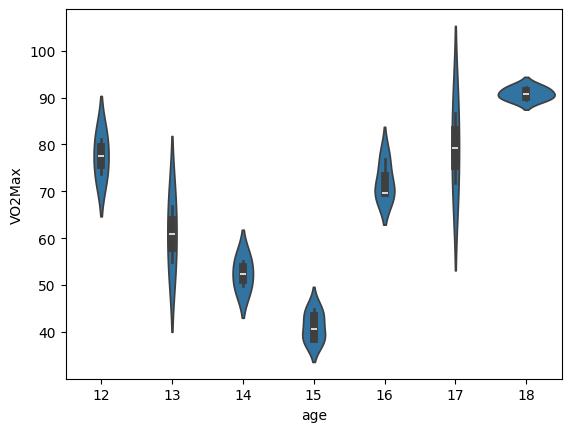

In [27]:
#grouping the data and calculating VO2Sum for each athlete
df = data_Merged.groupby(['ID'])['VO2'].sum().reset_index(name = 'VO2Sum')
#merging the data to fetch the weight of each athlete
df1 = pd.merge(df, data_Athletes[['ID','Weight','age']], on='ID', how='inner')
#calculating VO2Max
df1['VO2Max'] = df1['VO2Sum']/df1['Weight'] 
#displaying the plot
sns.violinplot(x ='age', y ='VO2Max', data = df1)

**79. Plot the Donut chart athlete distrubution by Gender**

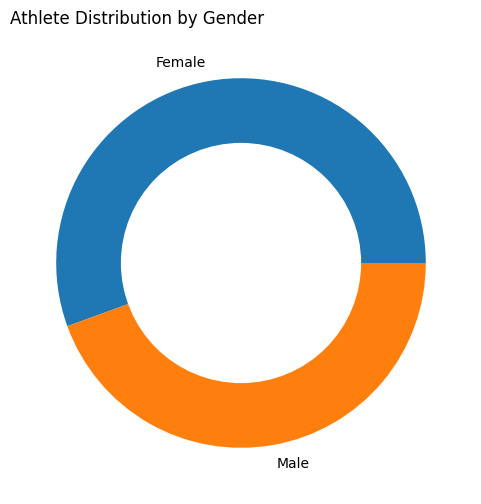

In [13]:
#count of athletes based on gender
count = data_Athletes['Gender'].value_counts()
#choosing the figure size
plt.figure(figsize=(6, 6))
#plotting the pie chart
plt.pie(count, labels=count.index)
#adding circle to the pie chart
hole = plt.Circle((0,0),0.65,facecolor = 'white')
plt.gcf().gca().add_artist(hole)
#adding Title of chart
plt.title('Athlete Distribution by Gender',loc = 'left') 
#display the plot
plt.show()

**80. find the size of Tuple for any given input**

In [14]:
#sample tuple
tupl = ("Python","Hackathon","Aug",2024)
#print the size of the tuple
print("Size of Tuple: " + str(tupl.__sizeof__()) + "bytes")
 

Size of Tuple: 56bytes
